# TP6 : Maximum de vraisemblance

## Nom : Balmondo
## Prénom : JP
## Groupe : A1

*(double cliquer pour compléter vos noms et groupe, puis valider en exécutant (CTRL+ENTREE))*

In [1]:
# Chargement des librairies
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
# Cette cellule n'est à exécuter qu'une fois afin de générer des données aléatoires,
# et afin de les recopier dans la cellule suivante

# Création aléatoire des données :
# génère 20 données (Xj,Yj), avec Xj=(xj1,xj2), Y=0 ou 1
# données centrées autour de 2 centres
X, Y = make_blobs(n_samples=20, centers=[[-0.5,-0.5],[0.5,0.5]], n_features=2, cluster_std=0.5,center_box=(-1, 1.0))
print('Liste des [x1j,x2j] (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(X,separator=',',max_line_width=10000).replace('\n', ''))
print('\nListe des Yj (à copier coller dans la cellule ci-dessous): \n\n',np.array2string(Y,separator=',',max_line_width=10000).replace('\n', ''))

Liste des [x1j,x2j] (à copier coller dans la cellule ci-dessous): 

 [[-0.54139596, 0.1663653 ], [ 0.38497392, 0.29226603], [-1.33735978,-0.79286683], [-1.29284494,-0.68191309], [-0.09587002, 1.15460404], [-0.72467463,-1.18076461], [-0.43172706, 0.76377998], [-0.97945086,-0.63866423], [ 0.337363  , 0.27533122], [-0.80811735,-0.39270169], [ 0.61781485, 0.12916074], [-1.02183894,-0.20800627], [ 0.59134461, 0.90292168], [-1.36031686, 0.73555023], [ 0.28849044,-0.00573173], [ 0.70554149, 0.18489408], [ 0.26086512, 0.52761918], [-0.37237938,-0.44670127], [ 1.37334382,-0.25740515], [ 1.74804526, 0.95054163]]

Liste des Yj (à copier coller dans la cellule ci-dessous): 

 [0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1]


In [3]:
# Modifier en copiant collant avec les données générées aléatoirement ci-dessus
X=np.array([[-0.54139596, 0.1663653 ], [ 0.38497392, 0.29226603], [-1.33735978,-0.79286683], [-1.29284494,-0.68191309], [-0.09587002, 1.15460404], [-0.72467463,-1.18076461], [-0.43172706, 0.76377998], [-0.97945086,-0.63866423], [ 0.337363  , 0.27533122], [-0.80811735,-0.39270169], [ 0.61781485, 0.12916074], [-1.02183894,-0.20800627], [ 0.59134461, 0.90292168], [-1.36031686, 0.73555023], [ 0.28849044,-0.00573173], [ 0.70554149, 0.18489408], [ 0.26086512, 0.52761918], [-0.37237938,-0.44670127], [ 1.37334382,-0.25740515], [ 1.74804526, 0.95054163]])
Y=np.array([0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,1,1])

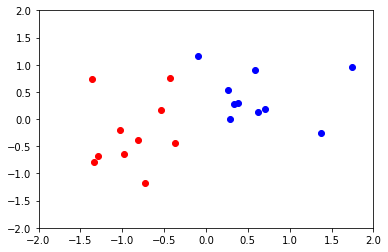

In [4]:
# Visualisation des données

# Création de la fenêtre
plt.xlim([-2,2])
plt.ylim([-2,2])

# Création d'un "masque" permettant d'identifier les X associés à Y=0, et affichage en rouge
mask=(Y==0)
plt.plot(X[mask, 0], X[mask, 1],'o',c='red')

# Création d'un "masque" permettant d'identifier les X associés à Y=1, et affichage en bleu
mask=(Y==1)

# Dessin des données
plt.plot(X[mask, 0], X[mask, 1],'o',c='blue')

### Exercice
D'après vos données, proposer des paramètres $b$, $w_1$ et $w_2$ tels que la fonction $$X=\begin{pmatrix}x_1\\x_2\end{pmatrix}\mapsto \sigma(b+w_1x_1+w_2x_2)$$ sépare au mieux les valeurs $(x_1,x_2,Y=0)$ des valeurs $(x_1,x_2,Y=1)$

Rappel : $\sigma(A)$ est "proche" de $0$ pour $A$ suffisamment négatif, et $\sigma(A)$ est "proche" de $1$ pour $A$ suffisammen positif

### *Reponse* :
- b= 10
- w1= 25
- w2= 40

*(double cliquer pour compléter votre réponse, puis valider en exécutant (CTRL+ENTREE))*

## Maximum de vraisemblance

On cherche $(b,w_1,w_2)$ tel que pour chacune des données $X_j=\begin{pmatrix}X_{j1}&X_{j2}\end{pmatrix}$, $Y_j\in\{0,1\}$, 
$$\sigma(b+w_1X_{i1}+w_2X_{i2})\simeq Y_i$$

Pour ce faire, on pose $h(X)=b+w_1x_1+w_2x_2$ et on considère la log-vraisemblance :
$$LogV(b,W)=\sum\limits_j\left(Y_j\log(\sigma(h(X_j)))+(1-Y_j)\log(1-\sigma(h(X_j)\right)$$
qu'on cherche à maximiser

### Exercice

Que mesure la vraisemblance, et donc la log-vraisemblance ?

Indication : une probabilité, laquelle ?

### Réponse :

La vraisemblance mesure  la probabilité que les arbres soient grands

(double cliquer pour compléter votre réponse, puis valider en exécutant (CTRL+ENTREE))

In [5]:
# Définition des fonctions

# Fonction sigmoïde
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Log-Vraisemblance
def LogV(b,w1,w2):
    return np.sum([Y[j]*np.log(sigmoid(b+w1*X[j][0]+w2*X[j][1]))
                   +(1-Y[j])*np.log(1-sigmoid(b+w1*X[j][0]+w2*X[j][1]))
                   for j in range(len(X))])


In [6]:
# Fonction permettant de représenter les courbes de niveau de $(w_1,w_2)-->LogV(b,w1,w2)
# paramétrées par b

def niveaux(b, w1_min=-5, w1_max=5, w2_min=-5, w2_max=5):
    # Tableau de valeur à 2 variables
    w1_values = np.linspace(w1_min, w1_max,100)
    w2_values = np.linspace(w2_min, w2_max,100)
    fct_values = [[LogV(b,w1,w2) for w1 in w1_values] for w2 in w2_values]
    # Fenêtre
    plt.xlim([w1_min, w1_max])
    plt.ylim([w2_min, w2_max])
    # Dessin de 50 courbes de niveaux
    plt.contour(w1_values, w2_values, fct_values, 50)
    # Légendes
    plt.colorbar()
    plt.xlabel('$w1$')
    plt.ylabel('$w2$')
    
# Fonction permettant de représenter les données (Xj,Yj) ainsi que la droite b+w1x1+w2x2=0
def separation(b,w1,w2):
    # Création de la fenêtre
    plt.xlim([-2,2])
    plt.ylim([-2,2])
    # Dessin des données
    mask=(Y==0)
    plt.plot(X[mask, 0], X[mask, 1],'o',c='red',clip_on=True)
    mask=(Y==1)
    plt.plot(X[mask, 0], X[mask, 1],'o',c='blue',clip_on=True)
    # Dessin de la droite d'équation b+w1x1+w2x2
    # si elle n'est pas verticale, elle coupe les bords gauche et droit de la fenêtre
    # en (-2,(-w1*(-2)-b)/w2) et (2,(-w1*2-b)/w2)
    # sinon, elle coupe les bords bas et haut de la fenêtre
    # en (-w2*(-2)-b)/w1,-2) et (-w2*2-b)/w1,2)
    if (w2!=0):
        plt.plot([-2,2],[(-w1*(-2)-b)/w2,(-w1*2-b)/w2],c="black")
    elif (w1!=0):
            plt.plot([(-w2*(-2)-b)/w1,(-w2*2-b)/w1],[-2,2],c="black")        
    plt.show

### Exercice
Faire apparaitre dans la figure suivante 
le point (w1*,w2*) maximisant la log-vraisemblance, à la dizaine près,
en explorant les valeurs de `b` et de la fenêtre `w1min,w1max,w2min,w2max`
(des avertissements de division par zéro peuvent apparaître, ne pas en tenir compte)

<ipython-input-5-4ee869cc4b27>:10: RuntimeWarning: divide by zero encountered in log
  +(1-Y[j])*np.log(1-sigmoid(b+w1*X[j][0]+w2*X[j][1]))
<ipython-input-5-4ee869cc4b27>:10: RuntimeWarning: invalid value encountered in multiply
  +(1-Y[j])*np.log(1-sigmoid(b+w1*X[j][0]+w2*X[j][1]))


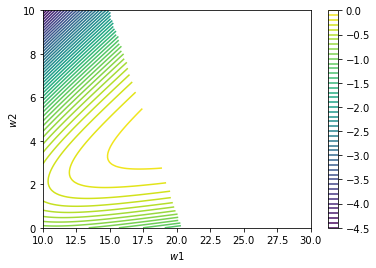

In [18]:
# Courbes de niveaux de la log vraisemblance selon w1,w2, pour b fixé
# Syntaxe :
# niveaux(b,w1min,w1max,w2min,w2max)

niveaux(1,10,30,0,10)

### Exercice
Faire apparaitre ci-dessous la droite $b+w_1x_1+w_2x_2=0$ trouvée par lecture graphique ci-dessus, et permettant de séparer au mieux les données

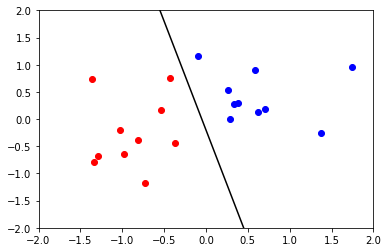

In [19]:
# Représentation des données et de la droite b+w1*x1+w2*x2=0
# Syntaxe : separation(b,w1,w2)
separation(1,20,5)

## Calcul du gradient

### Exercice

*Exercice à rendre sur papier (s'il vous reste du temps à la fin du TP)*

On rappelle ($\log$ désigne le logarithme népérien) : $$\sigma'(x)=\sigma(x)(1-\sigma(x))$$
$$(u(v(x)))'=u'(v(x))\times v'(x)$$
$$LogV(b,W)=\sum\limits_j\left(Y_j\log(\sigma(h(X_j)))+(1-Y_j)\log(1-\sigma(h(X_j)\right)$$

- En déduire $(\sigma(u(x)))'$ et $(\sigma(\ln(u(x))))'$ pour une fonction $u(x)$
- En déduire, en simplifiant au maximum les expressions obtenues :
    - $\frac{\partial LogV(b,W)}{\partial b}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)$
    - $\frac{\partial LogV(b,W)}{\partial w_1}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)x_{j1}$
    - $\frac{\partial LogV(b,W)}{\partial w_2}=\sum\limits_j\left(Y_j-\sigma(b+w_1x_{j1}+w_2x_{j_2}\right)x_{j2}$
- Compléter la cellule suivante avec les expressions des composantes du gradient

In [23]:
# À compléter par le gradient obtenu dans l'exercice précédent
# vous pouvez tester la syntaxe de ce que vous écrivez grace à la cellule suivante
def dLogV(b,w1,w2):
    return [np.sum([Y[j]-sigmoid(b+w1*X[j][0]+w2*X[j][1]) for j in range(len(X))]), # DLogV/db
            np.sum([(Y[j]-sigmoid(b+w1*X[j][0]+w2*X[j][1]))*X[j][0] for j in range(len(X))]), # Autre débilité
            np.sum([(Y[j]-sigmoid(b+w1*X[j][0]+w2*X[j][1]))*X[j][0] for j in range(len(X))]) # dernière débilité
           ] 

In [24]:
# Tester si la syntaxe de dLogV est correcte :
print('Gradient en b=1,w1=1,w1=2 : ',dLogV(1,1,2))

Gradient en b=1,w1=1,w1=2 :  [-3.1110927946445623, 3.8607757751622698, 3.8607757751622698]


## Algorithme de "montée" de gradient

In [25]:
def montee(b,w1,w2,tau=0.01,tolerance=1e-6,nbiterations=1000):
    diverge=False
    L=[]
    for i in range(nbiterations):
        g = dLogV(b,w1,w2)
        try: # traitement des erreurs si l'algorithme diverge
            L.append([b,w1,w2])
            if g[0]**2+g[1]**2+g[2]**2<tolerance:
                print('L\'algorithme a convergé en',i,'itérations. \nSolution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
                return L
            b=b+tau*g[0]
            w1=w1+tau*g[1]
            w2=w2+tau*g[2]
        except OverflowError as err: # traitement de l'erreur "overflow"
            print('L\'algorithme a divergé.\n Solution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
            diverge=True
            break
    if (diverge==False):        
        print('L\'algorithme n\'a pas convergé.\n Solution atteinte :\n b=',b,'\n w1=',w1,'\n w2=',w2,'\nGradient :',g,'\nNorme du gradient:',g[0]**2+g[1]**2+g[2]**2)
    return L

### Exercice 
Pourquoi doit-on dans l'algorithme mettre à jour les paramètres via la relation $$\begin{cases}b[n+1]=b[n]+\tau\times\frac{\partial LogV}{\partial b}\\w_1[n+1]=w_1[n]+\tau\times\frac{\partial LogV}{\partial w_1}\\w_2[n+1]=w_2[n]+\tau\times\frac{\partial LogV}{\partial w_2}\end{cases}$$ c'est à dire effecuer une **montée** de gradient, contrairement à l'algorithme de *descente* de gradient vue en cours ?

### *Réponse* :

Explications :
Parce que c'est plus fatiguant

### Exercice
Le graphique *ci-dessous* représente la droite $0+0x_1+1x_2=0$, associée aux paramètres $b=0$, $w_1=0$ et $w_2=1$.

Quel est le nombre d'erreurs de classification des données de la régression $X\mapsto \sigma(0+0x_1+1x_2)$ pour ces valeurs des paramètres ?

### *Réponse* : (sur le schéma : Y=1 observé en bleu, Y=0 observé en rouge)

- Nombre de faux positifs (Y=1 calculé, Y=0 observé) : 8 (n'importe quoi)
- Nombre de faux négatifs (Y=0 calculé, Y=1 observé) : 2
- Nombre total d'erreurs : 10

*(double cliquer pour compléter votre réponse, puis valider en exécutant (CTRL+ENTREE))*

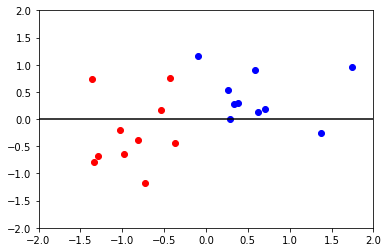

In [26]:
separation(0,0,1)

### Exercice

Utiliser la fonction `montee` pour retrouver la solution trouvée dans l'exploration graphique (début du TP), en initilisant l'algorithme à $b=0$, $w_1=0$, $w_2=1$, avec une tolérance de $10^{-5}$ et un pas $\tau$ et nombre d'itérations tels que l'algorithme converge

In [53]:
# Syntaxe : montee(b,w1,w2,tau,tolerance,nbiterations)

Wi=montee(0,0,1,0.05,1e-5,10000)

<ipython-input-5-4ee869cc4b27>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


L'algorithme n'a pas convergé.
 Solution atteinte :
 b= -92.76681471350669 
 w1= 322.9303822652933 
 w2= 323.9303822652934 
Gradient : [-0.18828848333376025, 0.6658978967229335, 0.6658978967229335] 
Norme du gradient: 0.922292570676181


### Exercice

- Quelle est l'équation de la droite obtenue par l'algorithme ?
- Est-ce la même droite que celle que vous avez déterminée dans l'exploration graphique ? Commentez

### *Réponse* :

Equation obtenue par l'algorithme :

Commentaire :

*(double cliquer pour compléter votre réponse, puis valider en exécutant (CTRL+ENTREE)*

### Représentation graphique de l'algorithme et de la solution

<function matplotlib.pyplot.show(*args, **kw)>

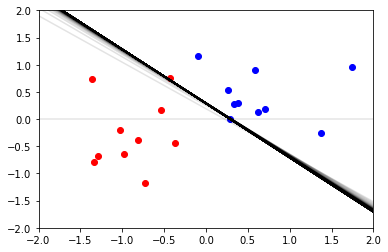

In [54]:
# Création de la fenêtre
plt.xlim([-2,2])
plt.ylim([-2,2])

#Affichage des données
mask=(Y==0)
plt.plot(X[mask, 0], X[mask, 1],'o',c='red',clip_on=True)
mask=(Y==1)
plt.plot(X[mask, 0], X[mask, 1],'o',c='blue',clip_on=True)

# Affichage de l'algorithme
# on choisit 100 valeurs de b,w1,w2 obtenues par la descente de gradient
# c'est à dire 100 équations b+w1x1+w2x2=0 visant à séparer les données
for i in np.linspace(0,len(Wi)-1,100):
    W=Wi[i.astype(int)]
    b,w1,w2=W[0],W[1],W[2]
    if (w2!=0):
        plt.plot([-2,2],[(-w1*(-2)-b)/w2,(-w1*2-b)/w2],c="black",alpha=0.1+0.9*i/(len(Wi)-1))
    elif (w1!=0):
        plt.plot([(-w2*(-2)-b)/w1,(-w2*2-b)/w1],[-2,2],c="black",alpha=0.1+0.9*i/(len(Wi)-1))        
    # alpha est un paramètre de transparence variant ici de 0.1 à 0.9 avec la valeur de i
plt.show

### Exercice

La régression optimale, selon les données, conserver des erreurs : pour quels types d'ensemble de données, et pourquoi ?

Quel est le nombre d'erreurs de classification de la régression obtenue par l'algorithme ?

### *Réponse* :

Explications (pourquoi il peut rester des erreurs) :


Nombre d'erreurs de la classification trouvée par l'algorithme :
- Nombre de faux positifs (Y=1 calculé, Y=0 observé) : 
- Nombre de faux négatifs (Y=0 calculé, Y=1 observé) :
- Nombre total d'erreurs : 

*(double cliquer pour compléter votre réponse, puis valider en exécutant (CTRL+ENTREE))*